In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
df = pd.read_csv('/content/synthetic_project_data (1).csv')
df.head()

,Re,Magnet Center Distance,Amplitude,Outlet Type,Magnet Shape,Efficiency
0,0.015,1700,10,Type A,Circular,94.0775
1,0.012,1200,8,Type B,Square,60.1975
2,0.010,1700,8,Type B,Square,85.1975
3,0.080,1750,0,Type B,Triangular,69.4675
4,0.100,1600,9,Type A,Square Rotated 45,82.6225


In [ ]:
df.shape

(600, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Re                      600 non-null    float64
 1   Magnet Center Distance  600 non-null    int64  
 2   Amplitude               600 non-null    int64  
 3   Outlet Type             600 non-null    object 
 4   Magnet Shape            600 non-null    object 
 5   Efficiency              600 non-null    float64
dtypes: float64(2), int64(2), object(2)
memory usage: 28.3+ KB


In [ ]:
label_enc_outlet = LabelEncoder()
label_enc_magnet = LabelEncoder()

In [ ]:
df['Outlet Type'] = label_enc_outlet.fit_transform(df['Outlet Type'])
df['Magnet Shape'] = label_enc_magnet.fit_transform(df['Magnet Shape'])

In [ ]:
X = df.drop(columns=['Efficiency'])
y = df['Efficiency']


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

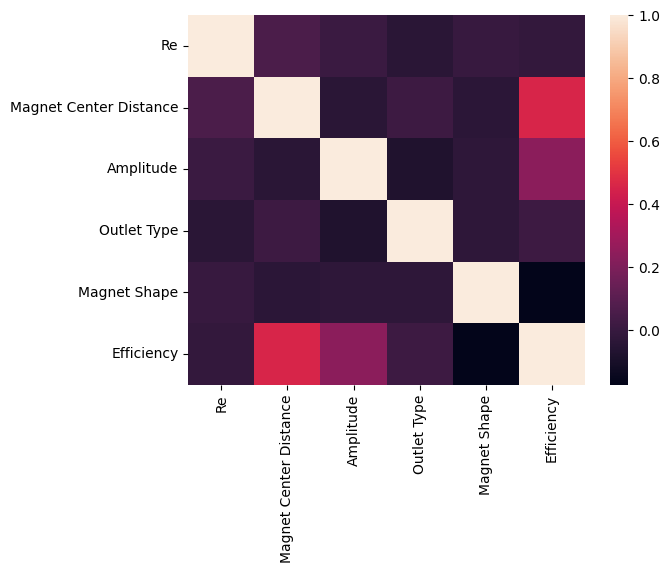

In [ ]:
dataplot=sns.heatmap(df.corr())
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 345,857 (1.32 MB)

 Trainable params: 345,857 (1.32 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6177 - mae: 0.6063 - val_loss: 15.2668 - val_mae: 2.7127
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8442 - mae: 0.6972 - val_loss: 16.8406 - val_mae: 3.1221
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.9208 - mae: 0.7327 - val_loss: 16.0452 - val_mae: 2.7568
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5933 - mae: 0.5898 - val_loss: 15.0374 - val_mae: 2.7016
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.5835 - mae: 0.5625 - val_loss: 13.2179 - val_mae: 2.5696
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9527 - mae: 0.7092 - val_loss: 16.7153 - val_mae: 2.7242
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7784 - mae: 0.6529 - val_loss: 16.2687 - val_mae: 2.8006
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.8071 - mae: 0.6555 - val_loss: 16.7357 - val_mae: 2.8199
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - los

In [ ]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Absolute Error: {mae:.2f}")

Test Mean Absolute Error: 2.99


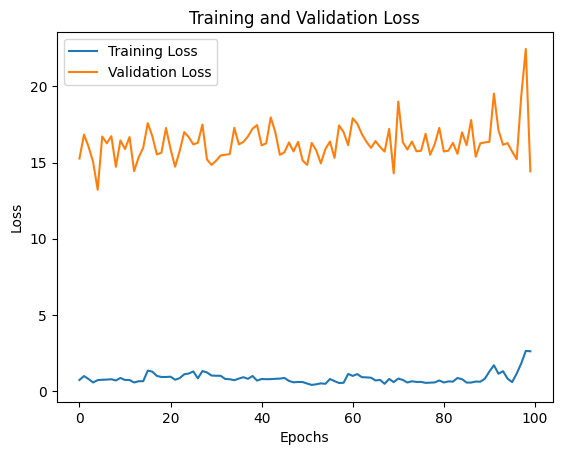

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


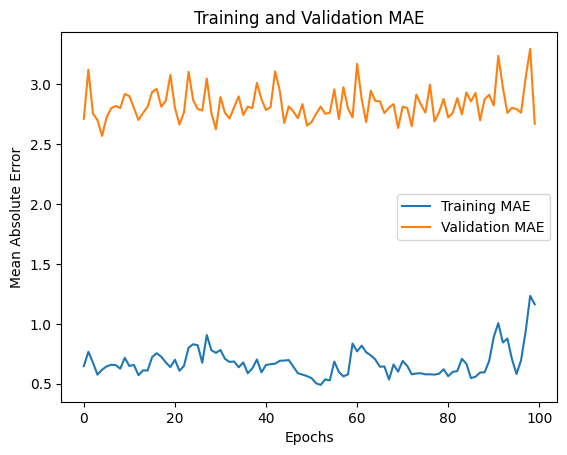

In [ ]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

## CNN

In [ ]:
from tensorflow.keras.layers import Conv2D, Flatten, Dense, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential

In [ ]:
X_reshaped = X_scaled.reshape(X_scaled.shape[0], X_scaled.shape[1], 1, 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

In [ ]:
model = Sequential([
    Conv2D(32, (1, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1), padding='same'),
    Conv2D(64, (1, 1), activation='relu', padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(1)  # Output layer for regression
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 5, 1, 32)            │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 1, 64)            │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 320)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 128)                 │          41,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 43,393 (169.50 KB)

 Trainable params: 43,393 (169.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=300, batch_size=32, verbose=1)

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 129.8669 - mae: 9.1668 - val_loss: 126.0504 - val_mae: 9.0985
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 139.9442 - mae: 9.6573 - val_loss: 125.5417 - val_mae: 9.1583
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 115.7059 - mae: 8.5018 - val_loss: 118.8514 - val_mae: 8.7796
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 98.8408 - mae: 7.7406 - val_loss: 117.7246 - val_mae: 8.8109
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 119.3461 - mae: 8.7976 - val_loss: 111.3802 - val_mae: 8.4996
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 107.8578 - mae: 8.0811 - val_loss: 108.1062 - val_mae: 8.3263
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 135.1041 - mae: 9.1816 - val_loss: 109.4861 - val_mae: 8.4736
Epoch 8/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 115.7098 - mae: 8.7772 - val_loss: 100.6082 - val_mae: 8.0041
Epoch 9/300
12/12 ━━━━━━━━━━━━━━━

In [ ]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Mean Absolute Error: {mae:.2f}")


Test Mean Absolute Error: 1.88
